<a href="https://colab.research.google.com/github/aser-tesfaye/Image_Classification_with_CNN/blob/main/Image_classification_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [45]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [46]:
X_test.shape

(10000, 32, 32, 3)

In [47]:
y_train.shape

(50000, 1)

#### # Display the labels of the first five images in the training set

In [48]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [49]:
y_train = y_train.reshape(-1,) # Flatten the labels array to a 1D array
y_train[:5] # Display the first five labels

array([6, 9, 9, 4, 1], dtype=uint8)

In [50]:
y_test = y_test.reshape(-1,) # Flatten the labels array to a 1D array

In [51]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] # Define the class labels

In [52]:
def plot_sample(X, y, index): # Define a function to plot a sample image and its label
    plt.figure(figsize = (15,2))  # Set the figure size to (15,2) inches
    plt.imshow(X[index])  # Display the image at the specified index
    plt.xlabel(classes[y[index]])  # Set the x-label to the corresponding class label

The function `plot_sample` takes three arguments:

`X`: This is your image data.

`y`: This contains the labels for your images.

`index`: This is the index of the specific image you want to plot.

In [53]:
import random

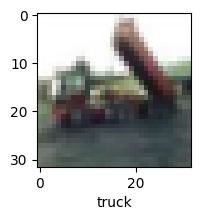

In [54]:
plot_sample(X_train, y_train, 2)

In [55]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [56]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [69]:
cnn = cnns.Sequential([
    #cnn
    layers.Conv2D(filters=64, kernel_size=(4, 4), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [71]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
cnn.fit(X_train, y_train, epochs=10)
#An epoch means training the neural network with all the training data for one cycle

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.3943 - loss: 1.6594
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6173 - loss: 1.1004
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6693 - loss: 0.9503
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7117 - loss: 0.8406
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7419 - loss: 0.7441
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7651 - loss: 0.6668
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7844 - loss: 0.6203
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8053 - loss: 0.5557
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8233 - loss: 0.4999
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.8391 - loss: 0.4541


In [60]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7065 - loss: 0.9634


[0.9896570444107056, 0.7023000121116638]

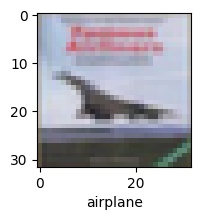

In [61]:
plot_sample(X_test, y_test,3)

In [62]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


array([[1.4510377e-05, 1.4777107e-05, 3.0471760e-04, 9.1270763e-01,
        6.6558726e-04, 8.3035484e-02, 2.7819662e-03, 1.8191589e-05,
        4.5573941e-04, 1.3855665e-06],
       [3.0312184e-04, 3.6526181e-02, 2.2325035e-07, 1.4534022e-07,
        5.0451615e-10, 8.7730063e-09, 6.3418519e-09, 1.8430936e-09,
        9.6310753e-01, 6.2775995e-05],
       [6.6942967e-02, 1.2311189e-01, 1.5735131e-03, 1.9955407e-03,
        1.0344971e-03, 1.3525921e-03, 8.2872785e-04, 1.1870526e-03,
        6.7035258e-01, 1.3162063e-01],
       [9.2144233e-01, 9.2653099e-05, 4.7199898e-03, 3.8775965e-04,
        6.3830325e-05, 1.6456486e-05, 2.7973131e-06, 3.8697119e-05,
        7.3227592e-02, 7.9045421e-06],
       [1.3174897e-11, 2.0856232e-06, 1.8499157e-03, 1.5710093e-03,
        6.8893224e-01, 1.4005818e-06, 3.0764300e-01, 1.5558859e-07,
        3.9591729e-08, 1.2477216e-07]], dtype=float32)

In [63]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:15]

[3, 8, 8, 0, 4, 6, 3, 6, 3, 1, 4, 9, 3, 7, 9]

In [64]:
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

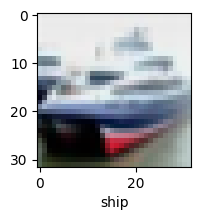

In [65]:
plot_sample(X_test, y_test,1)

In [66]:
classes[y_classes[3]]

'airplane'

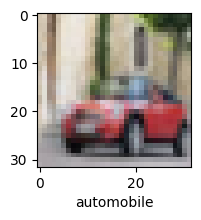

In [67]:
index = random.randint(0,9999)
classes[y_classes[index]]
plot_sample(X_test, y_test,index)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.3838 - loss: 1.6975 - val_accuracy: 0.5548 - val_loss: 1.2405
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6117 - loss: 1.1187 - val_accuracy: 0.6525 - val_loss: 1.0238
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6726 - loss: 0.9453 - val_accuracy: 0.6832 - val_loss: 0.9358
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7137 - loss: 0.8281 - val_accuracy: 0.6828 - val_loss: 0.9352
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7377 - loss: 0.7492 - val_accuracy: 0.6887 - val_loss: 0.9133
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7629 - loss: 0.6830 - val_accuracy: 0.7029 - val_loss: 0.8868
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7840 - loss: 0.6180 - val_accuracy: 0.7033 - val_loss: 0.9045
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8012 -

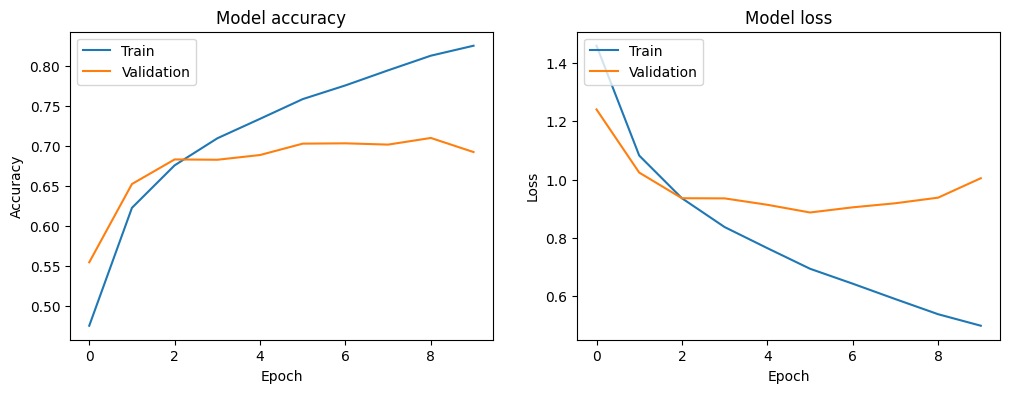

In [72]:
# Assuming 'history' is the output from cnn.fit()
history = cnn.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [80]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the training and test images
print(f"Training images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")


Training images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


In [86]:
from tensorflow.keras.models import Model

# Get the output of the first convolutional layer
layer_outputs = [layer.output for layer in cnn.layers if 'conv' in layer.name]



In [87]:
activation_model = Model(inputs=cnn.input, outputs=layer_outputs)

ValueError: The layer sequential_3 has never been called and thus has no defined input.

In [ ]:

# Choose an image to pass through the model
img = train_images[0]
img = np.expand_dims(img, axis=0)

# Get the feature maps
feature_maps = activation_model.predict(img)

# Plot the feature maps for the first convolutional layer
first_layer_activation = feature_maps[0]
layer_name = cnn.layers[0].name

plt.figure(figsize=(15, 15))
for i in range(first_layer_activation.shape[-1]):
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
plt.suptitle(f'Feature maps of layer: {layer_name}')
plt.show()
